In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('airfoil_self_noise.csv')
df.head()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frquency(Hz)          1503 non-null   int64  
 1   Angle_of_Attack       1503 non-null   float64
 2   Chord_Length          1503 non-null   float64
 3   Free_stream_velocity  1503 non-null   float64
 4   Displacement          1503 non-null   float64
 5   Sound_pressure_level  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


# No missing values in the dataset

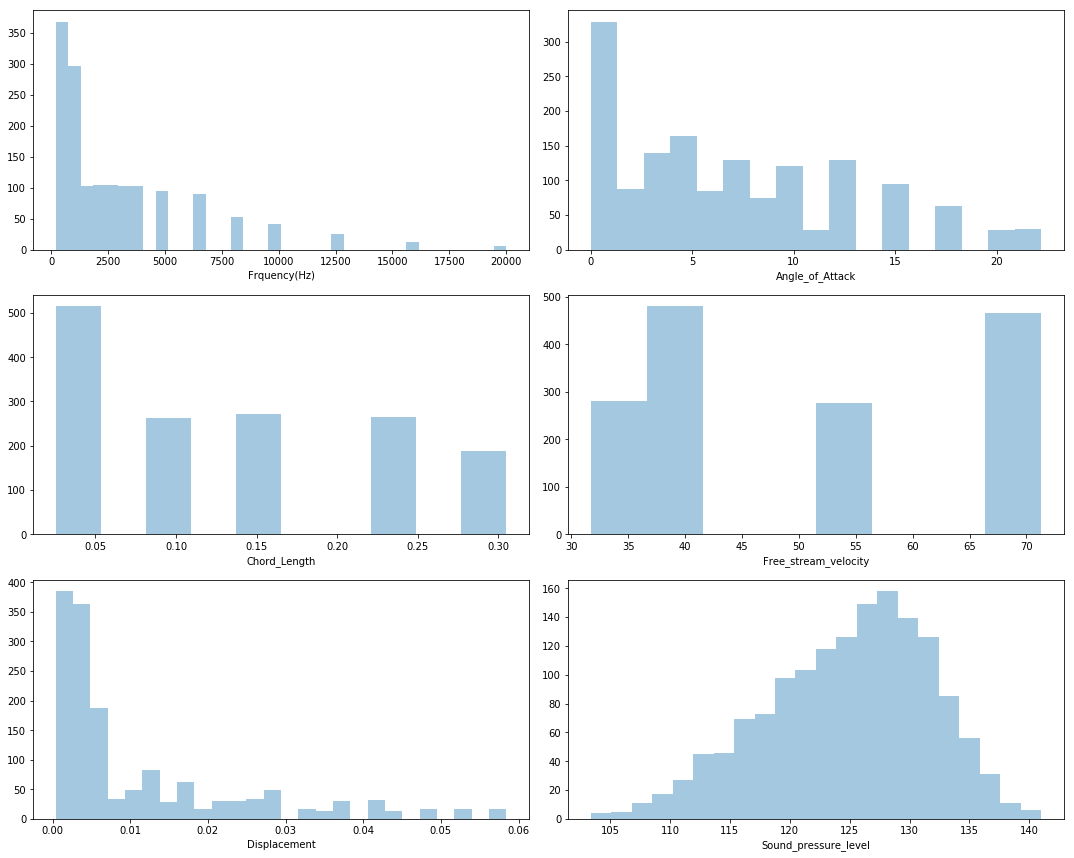

In [4]:
fig = plt.figure(figsize=(15,12))
for index,col in enumerate(df):
    plt.subplot(3,2,index+1)
    sns.distplot(df.loc[:,col],kde= False)
fig.tight_layout(pad=1.0)

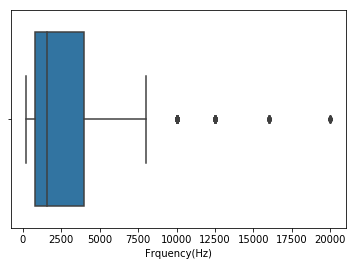

In [5]:
sns.boxplot(df['Frquency(Hz)'])

In [6]:
df = df.drop(df[df['Frquency(Hz)']>7000].index)

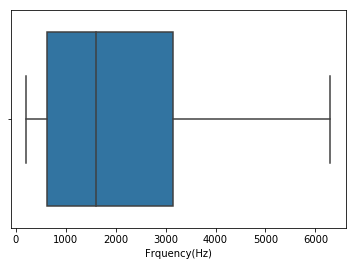

In [7]:
sns.boxplot(df['Frquency(Hz)'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frquency(Hz)          1365 non-null   int64  
 1   Angle_of_Attack       1365 non-null   float64
 2   Chord_Length          1365 non-null   float64
 3   Free_stream_velocity  1365 non-null   float64
 4   Displacement          1365 non-null   float64
 5   Sound_pressure_level  1365 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 74.6 KB


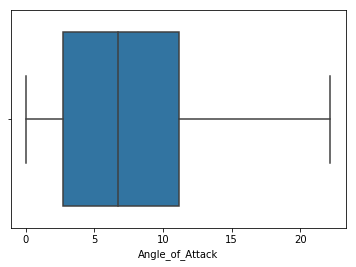

In [9]:
sns.boxplot(df['Angle_of_Attack'])

In [10]:
df['Chord_Length'].value_counts()

0.2286    250
0.1524    248
0.1016    246
0.0254    241
0.0508    219
0.3048    161
Name: Chord_Length, dtype: int64

In [11]:
df['Free_stream_velocity'].describe()

count    1365.000000
mean       50.279341
std        15.498798
min        31.700000
25%        39.600000
50%        39.600000
75%        71.300000
max        71.300000
Name: Free_stream_velocity, dtype: float64

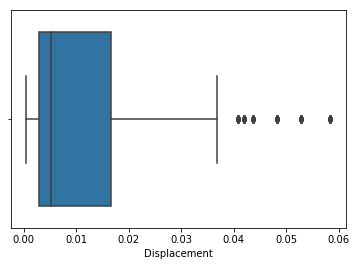

In [12]:
sns.boxplot(df['Displacement'])

In [13]:
df = df.drop(df[df['Displacement']>0.0380].index)

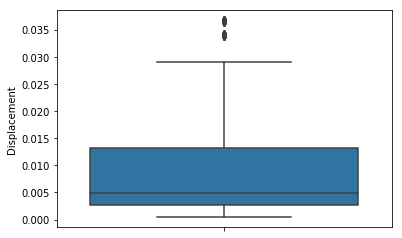

In [14]:
sns.boxplot(y = df['Displacement'])

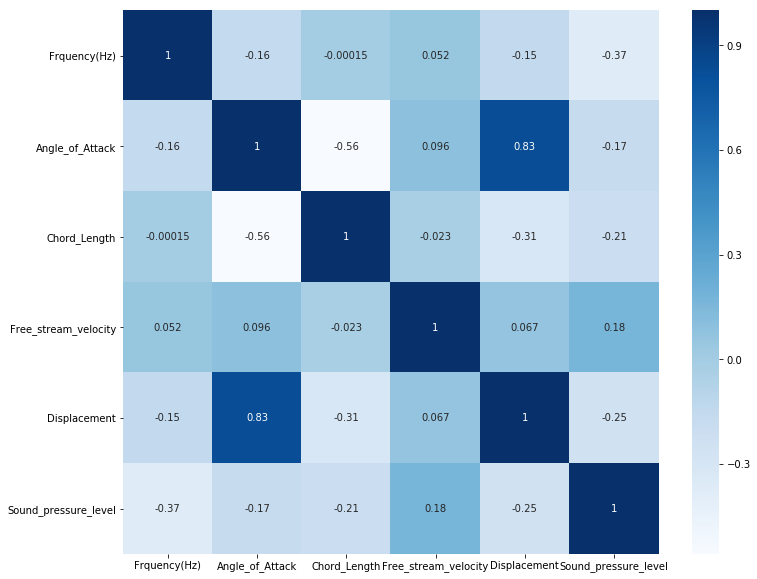

In [15]:
plt.figure(figsize=(12,10))
correl_ = df.corr()
sns.heatmap(correl_, annot = True, cmap = 'Blues')

## we see that Angle of Attack and Displacement is correlated and hence we will be dropping one of the features

In [16]:
df.drop('Displacement',axis = 1, inplace = True)

from sklearn.preprocessing import RobustScaler
cols = df.columns
transformer = RobustScaler().fit(df[cols])
df[cols] = transformer.transform(df[cols])

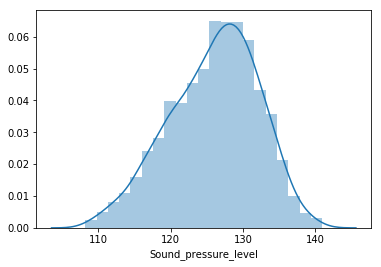

In [17]:
sns.distplot(df['Sound_pressure_level'])

In [18]:
#from scipy import stats 
#label_data, lambda1 = stats.boxcox(df['Sound_pressure_level']) # transforming to normal Distribution

In [19]:
#df['label_data'] = label_data

In [20]:
#sns.distplot(df['label_data'])

In [21]:
#drop = ['label_data','Sound_pressure_level']
#x = df.drop(drop, axis = 1).values

In [22]:
x = df.drop('Sound_pressure_level', axis =1).values
y = df['Sound_pressure_level'].values

In [23]:
x.shape

(1271, 4)

In [24]:
y = y[:, np.newaxis]

In [25]:
y.shape

(1271, 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.23, random_state= 100)

In [27]:
y_test.shape

(293, 1)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
rsqaure_val = r2_score(y_test, predict)
print(rsqaure_val)

0.47989713598568473


In [29]:
import statsmodels.api as sm

x = sm.add_constant(x)

model1=sm.OLS(y,x)

result=model1.fit()

print(result.params)

print(result.summary())

/home/lokesh/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


[ 1.33008324e+02 -1.62773861e-03 -5.76676649e-01 -3.29513899e+01
  9.60025282e-02]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     226.8
Date:                Sun, 11 Oct 2020   Prob (F-statistic):          7.25e-147
Time:                        03:19:02   Log-Likelihood:                -3767.1
No. Observations:                1271   AIC:                             7544.
Df Residuals:                    1266   BIC:                             7570.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

# Important Note

### R-squared and Adjusted R-squared:
- If the values of Adjusted Rsqaured and R-sqaured is very different, it is a sign that A feauture/variable, might not be relevant to your model.
- Here no such problem occurs

### F - Statistic or F-test, 
- It is used for assessing the overall significance of a model. In a Multiple LR, it compares the model with no predictors. 
- The Null hypothesis is that these 2 models are equal and Alternate Hypo is that the intercept only model is worse that our model.

- We get back a p-value as well as a statistic value, that helps us to select/reject Null hypothesis.

- In our case, the p-value is very small (0.00) and high F-statistic value, therefore we reject our Null hypothesis and conclude that there is a Linear Relationship between F1,F2,F3 and the Target Variable.

### T-test:

- Unlike f-test, t-test compares each Features with the Target Variable and tells if there is a relationship between them.

- Null hypothesis is that the feature variable is going to be 0 and The Alternate Hypothesis is that the Feature coefficient is not going to be 0.

- Higher the t-test value, higher the chances that you reject the Null hypothesis. As per our model, the value is high and hence we reject the Null hypothesis (also p-value < 0.05 to reject the Null hypothesis) .

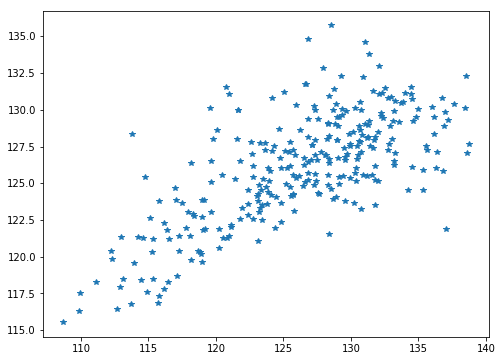

In [30]:
plt.figure(figsize = (8,6))
plt.plot(y_test, predict,'*')